In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime
from matplotlib.dates import date2num
import matplotlib

import statsmodels.api as sm
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statsmodels.tsa.stattools import adfuller

from scipy import stats
from scipy.stats import kurtosis, skew

# Datetime lib
from pandas import to_datetime
import itertools
import warnings
import datetime
warnings.filterwarnings('ignore')

from statsmodels.tsa.tsatools import lagmat
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.model_selection import train_test_split
from datetime import timedelta

In [2]:
tableGA=pd.read_csv('Analytics Main - Jan 1st - Dec 7th.csv',delimiter=',')

In [3]:
tableGA=tableGA.dropna()

In [4]:
tableGA['Date']=pd.to_datetime(tableGA['Date'],format='%d/%m/%Y')

In [5]:
tableGA.head()

,Date,Product Adds To Cart,Cart-to-Detail Rate,Unique Purchases,Product Checkouts,Buy-to-Detail Rate
0,2021-01-01,"7,671",16.43%,"1,907","32,100",4.08%
1,2021-01-02,"5,827",16.89%,"1,645","24,764",4.77%
2,2021-01-03,"7,905",14.99%,"2,246","28,748",4.26%
3,2021-01-04,"4,725",15.92%,"1,400","19,793",4.72%
4,2021-01-05,"4,114",15.58%,966,"19,071",3.66%


In [6]:
tableGA['weekend'] = ((tableGA.Date.dt.dayofweek) // 5 == 1).astype(float)

In [7]:
tableGA['weekday'] = tableGA['Date'].apply(lambda x: x.weekday())

In [8]:
pd.set_option('display.max_rows', 10)

In [9]:
# Feature engineering with the date
tableGA['year']=tableGA.Date.dt.year 
tableGA['month']=tableGA.Date.dt.month 
tableGA['day']=tableGA.Date.dt.day

In [10]:
# For the next graphics
tableGA['month_num'] = tableGA['month']

tableGA['month'].replace('1','1 - January',inplace=True)
tableGA['month'].replace('2','2 - Febuary',inplace=True)
tableGA['month'].replace('3','3 - March',inplace=True)
tableGA['month'].replace('4','4- April',inplace=True)
tableGA['month'].replace('5','5 - May',inplace=True)
tableGA['month'].replace('6','6 - June',inplace=True)
tableGA['month'].replace('7','7 - July',inplace=True)
tableGA['month'].replace('8','8 - August',inplace=True)
tableGA['month'].replace('9','8 - September',inplace=True)
tableGA['month'].replace('10','10 - October',inplace=True)
tableGA['month'].replace('11','11 - November',inplace=True)


tableGA['weekday_num'] = tableGA['weekday']
tableGA['weekday'].replace(0,'01 - Monday',inplace=True)
tableGA['weekday'].replace(1,'02 - Tuesday',inplace=True)
tableGA['weekday'].replace(2,'03 - Wednesday',inplace=True)
tableGA['weekday'].replace(3,'04 - Thursday',inplace=True)
tableGA['weekday'].replace(4,'05 - Friday',inplace=True)
tableGA['weekday'].replace(5,'06 - Saturday',inplace=True)
tableGA['weekday'].replace(6,'07 - Sunday',inplace=True)

In [11]:
tableGA=tableGA.dropna()

In [12]:
tableGA

,Date,Product Adds To Cart,Cart-to-Detail Rate,Unique Purchases,Product Checkouts,Buy-to-Detail Rate,weekend,weekday,year,month,day,month_num,weekday_num
0,2021-01-01,"7,671",16.43%,"1,907","32,100",4.08%,0.0,05 - Friday,2021,1,1,1,4
1,2021-01-02,"5,827",16.89%,"1,645","24,764",4.77%,1.0,06 - Saturday,2021,1,2,1,5
2,2021-01-03,"7,905",14.99%,"2,246","28,748",4.26%,1.0,07 - Sunday,2021,1,3,1,6
3,2021-01-04,"4,725",15.92%,"1,400","19,793",4.72%,0.0,01 - Monday,2021,1,4,1,0
4,2021-01-05,"4,114",15.58%,966,"19,071",3.66%,0.0,02 - Tuesday,2021,1,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,2021-12-03,"5,083",11.25%,"1,398","4,225",3.09%,0.0,05 - Friday,2021,12,3,12,4
337,2021-12-04,"4,211",10.17%,"1,173","3,975",2.83%,1.0,06 - Saturday,2021,12,4,12,5
338,2021-12-05,"5,607",9.87%,"1,699","6,331",2.99%,1.0,07 - Sunday,2021,12,5,12,6
339,2021-12-06,"4,525",10.67%,"1,196","4,157",2.82%,0.0,01 - Monday,2021,12,6,12,0


# Visuals

In [13]:
tableGA["Unique Purchases"]=tableGA["Unique Purchases"].astype(str)

In [14]:
tableGA['Unique Purchases']=tableGA['Unique Purchases'].str.replace(',','').astype(int)

In [15]:
GA_UP_Group=tableGA.groupby(["month","weekday"])['Unique Purchases'].mean().reset_index()

In [16]:
GA_UP_Group=pd.pivot_table(GA_UP_Group,values=['Unique Purchases'],index=['weekday'],
                           columns=['month'],
                           aggfunc={'Unique Purchases':np.mean})

In [17]:
GA_UP_Group.sort_index(inplace=True)

In [18]:
GA_UP_Group

Unique Purchases                                               \
month                        1        2        3        4        5        6    
weekday                                                                        
01 - Monday             1418.25  1376.50  1025.80  1196.25  1967.20  1646.75   
02 - Tuesday            1288.25  1196.50   975.20  1186.00  2430.25  1408.60   
03 - Wednesday          2381.25  1652.00  1112.40  2711.00  1943.75  1360.20   
04 - Thursday           1474.25  1256.25   953.50  1382.00  1456.25  1213.75   
05 - Friday             1674.00  1375.75   917.25  1565.00  1825.75  1218.75   
06 - Saturday           1526.60  1209.25   994.75   885.50  1651.40  1194.25   
07 - Sunday             2700.80  1547.75  1300.50  1575.75  2416.60  1969.00   

                                                                    
month                7       8        9        10       11      12  
weekday                                                             
01 - Monday     1097.75  2104.2  1762.75  1578.50  3737.20  1196.0  
02 - Tuesday    1232.25  1918.0  1794.50  1475.75  2503.00  1197.0  
03 - Wednesday  1211.75  1562.5  1841.20  1293.75  2305.50  1515.0  
04 - Thursday   1269.00  1462.5  1640.00   914.75  3275.50  1652.0  
05 - Friday      949.60  1517.0  1310.00  1252.40  7633.75  1398.0  
06 - Saturday   1002.20  1512.5  1444.50  1531.60  4089.25  1173.0  
07 - Sunday     1514.50  2178.8  2215.00  2208.20  5291.50  1699.0

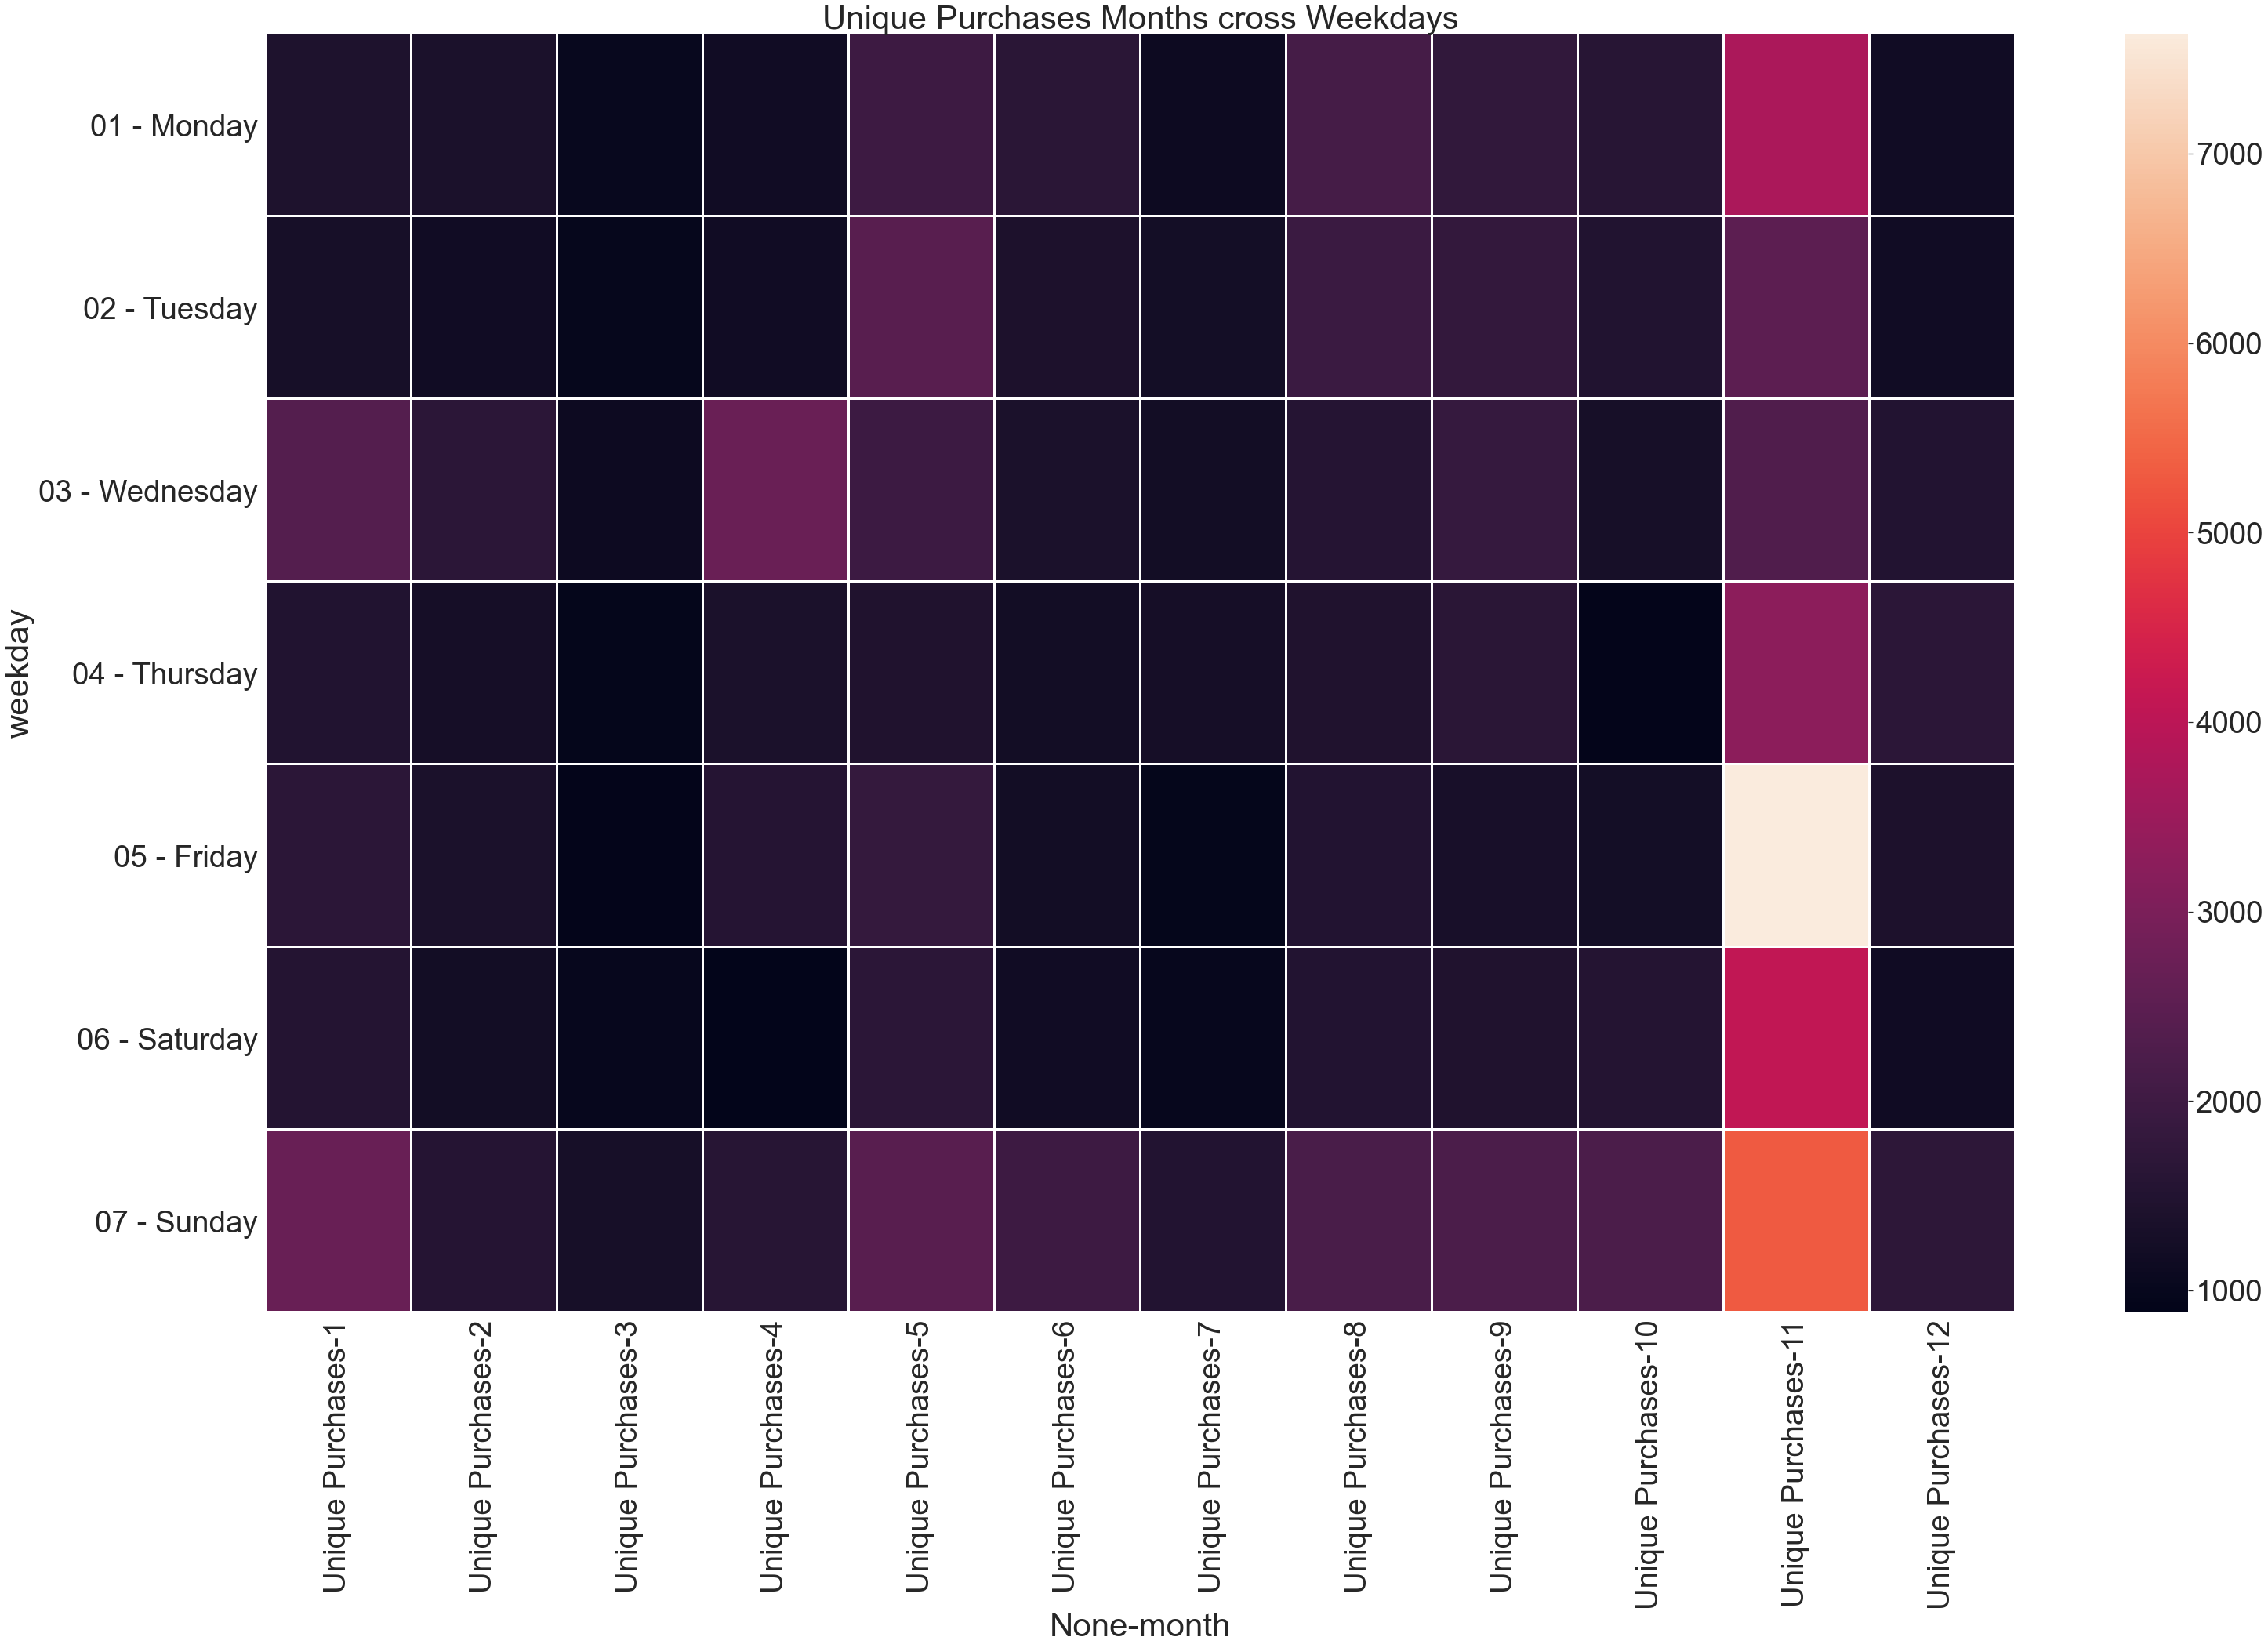

In [19]:
sns.set(font_scale=3.5) 

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(50, 30))
sns.heatmap(GA_UP_Group, annot=False, ax=ax, fmt="d", linewidths=2)
plt.title('Unique Purchases Months cross Weekdays')
plt.show()

In [20]:
GA_day_UP = tableGA.groupby(["month", "day"])['Unique Purchases'].mean().reset_index()
GA_day_UP = tableGA.pivot('day','month','Unique Purchases')
GA_day_UP.sort_index(inplace=True)

In [21]:
GA_day_UP = pd.pivot_table(tableGA, values=['Unique Purchases'],index=['day'],
                                 columns=['month'],
                                aggfunc={'Unique Purchases': np.mean})

In [22]:
GA_day_UP

Unique Purchases                                                  \
month               1       2       3       4       5       6       7    
day                                                                      
1               1907.0  1953.0  1091.0   425.0  3000.0   786.0  1759.0   
2               1645.0  1628.0  1094.0   657.0  4479.0  1589.0  1320.0   
3               2246.0  2627.0  1393.0   870.0  4420.0  1269.0  1361.0   
4               1400.0  1846.0  1100.0  1325.0  3164.0  1337.0  2343.0   
5                966.0  2640.0  1162.0  1587.0  3118.0  1089.0  1343.0   
..                 ...     ...     ...     ...     ...     ...     ...   
27              2249.0  1057.0   813.0  2269.0  1320.0  2408.0  1397.0   
28              1631.0  1344.0   892.0  6769.0  1481.0  1785.0  1793.0   
29              2174.0     NaN   685.0  3162.0    29.0  2271.0  1929.0   
30              2022.0     NaN   716.0  3823.0    12.0  1867.0  1166.0   
31              4033.0     NaN   730.0     NaN     6.0     NaN  1192.0   

                                               
month      8       9       10      11      12  
day                                            
1      1723.0  1956.0  1764.0  2130.0  1515.0  
2      1679.0  1804.0  1723.0  1731.0  1652.0  
3      1618.0  1450.0  2357.0  1555.0  1398.0  
4      1325.0  1650.0  1384.0  1283.0  1173.0  
5      1336.0  2397.0  1601.0  1763.0  1699.0  
..        ...     ...     ...     ...     ...  
27     1304.0  1490.0  1624.0  8938.0     NaN  
28     1366.0  2603.0  1732.0  8519.0     NaN  
29     2096.0  2702.0  1458.0  7138.0     NaN  
30     2628.0  1986.0  1433.0  2299.0     NaN  
31     2368.0     NaN  2295.0     NaN     NaN  

[31 rows x 12 columns]

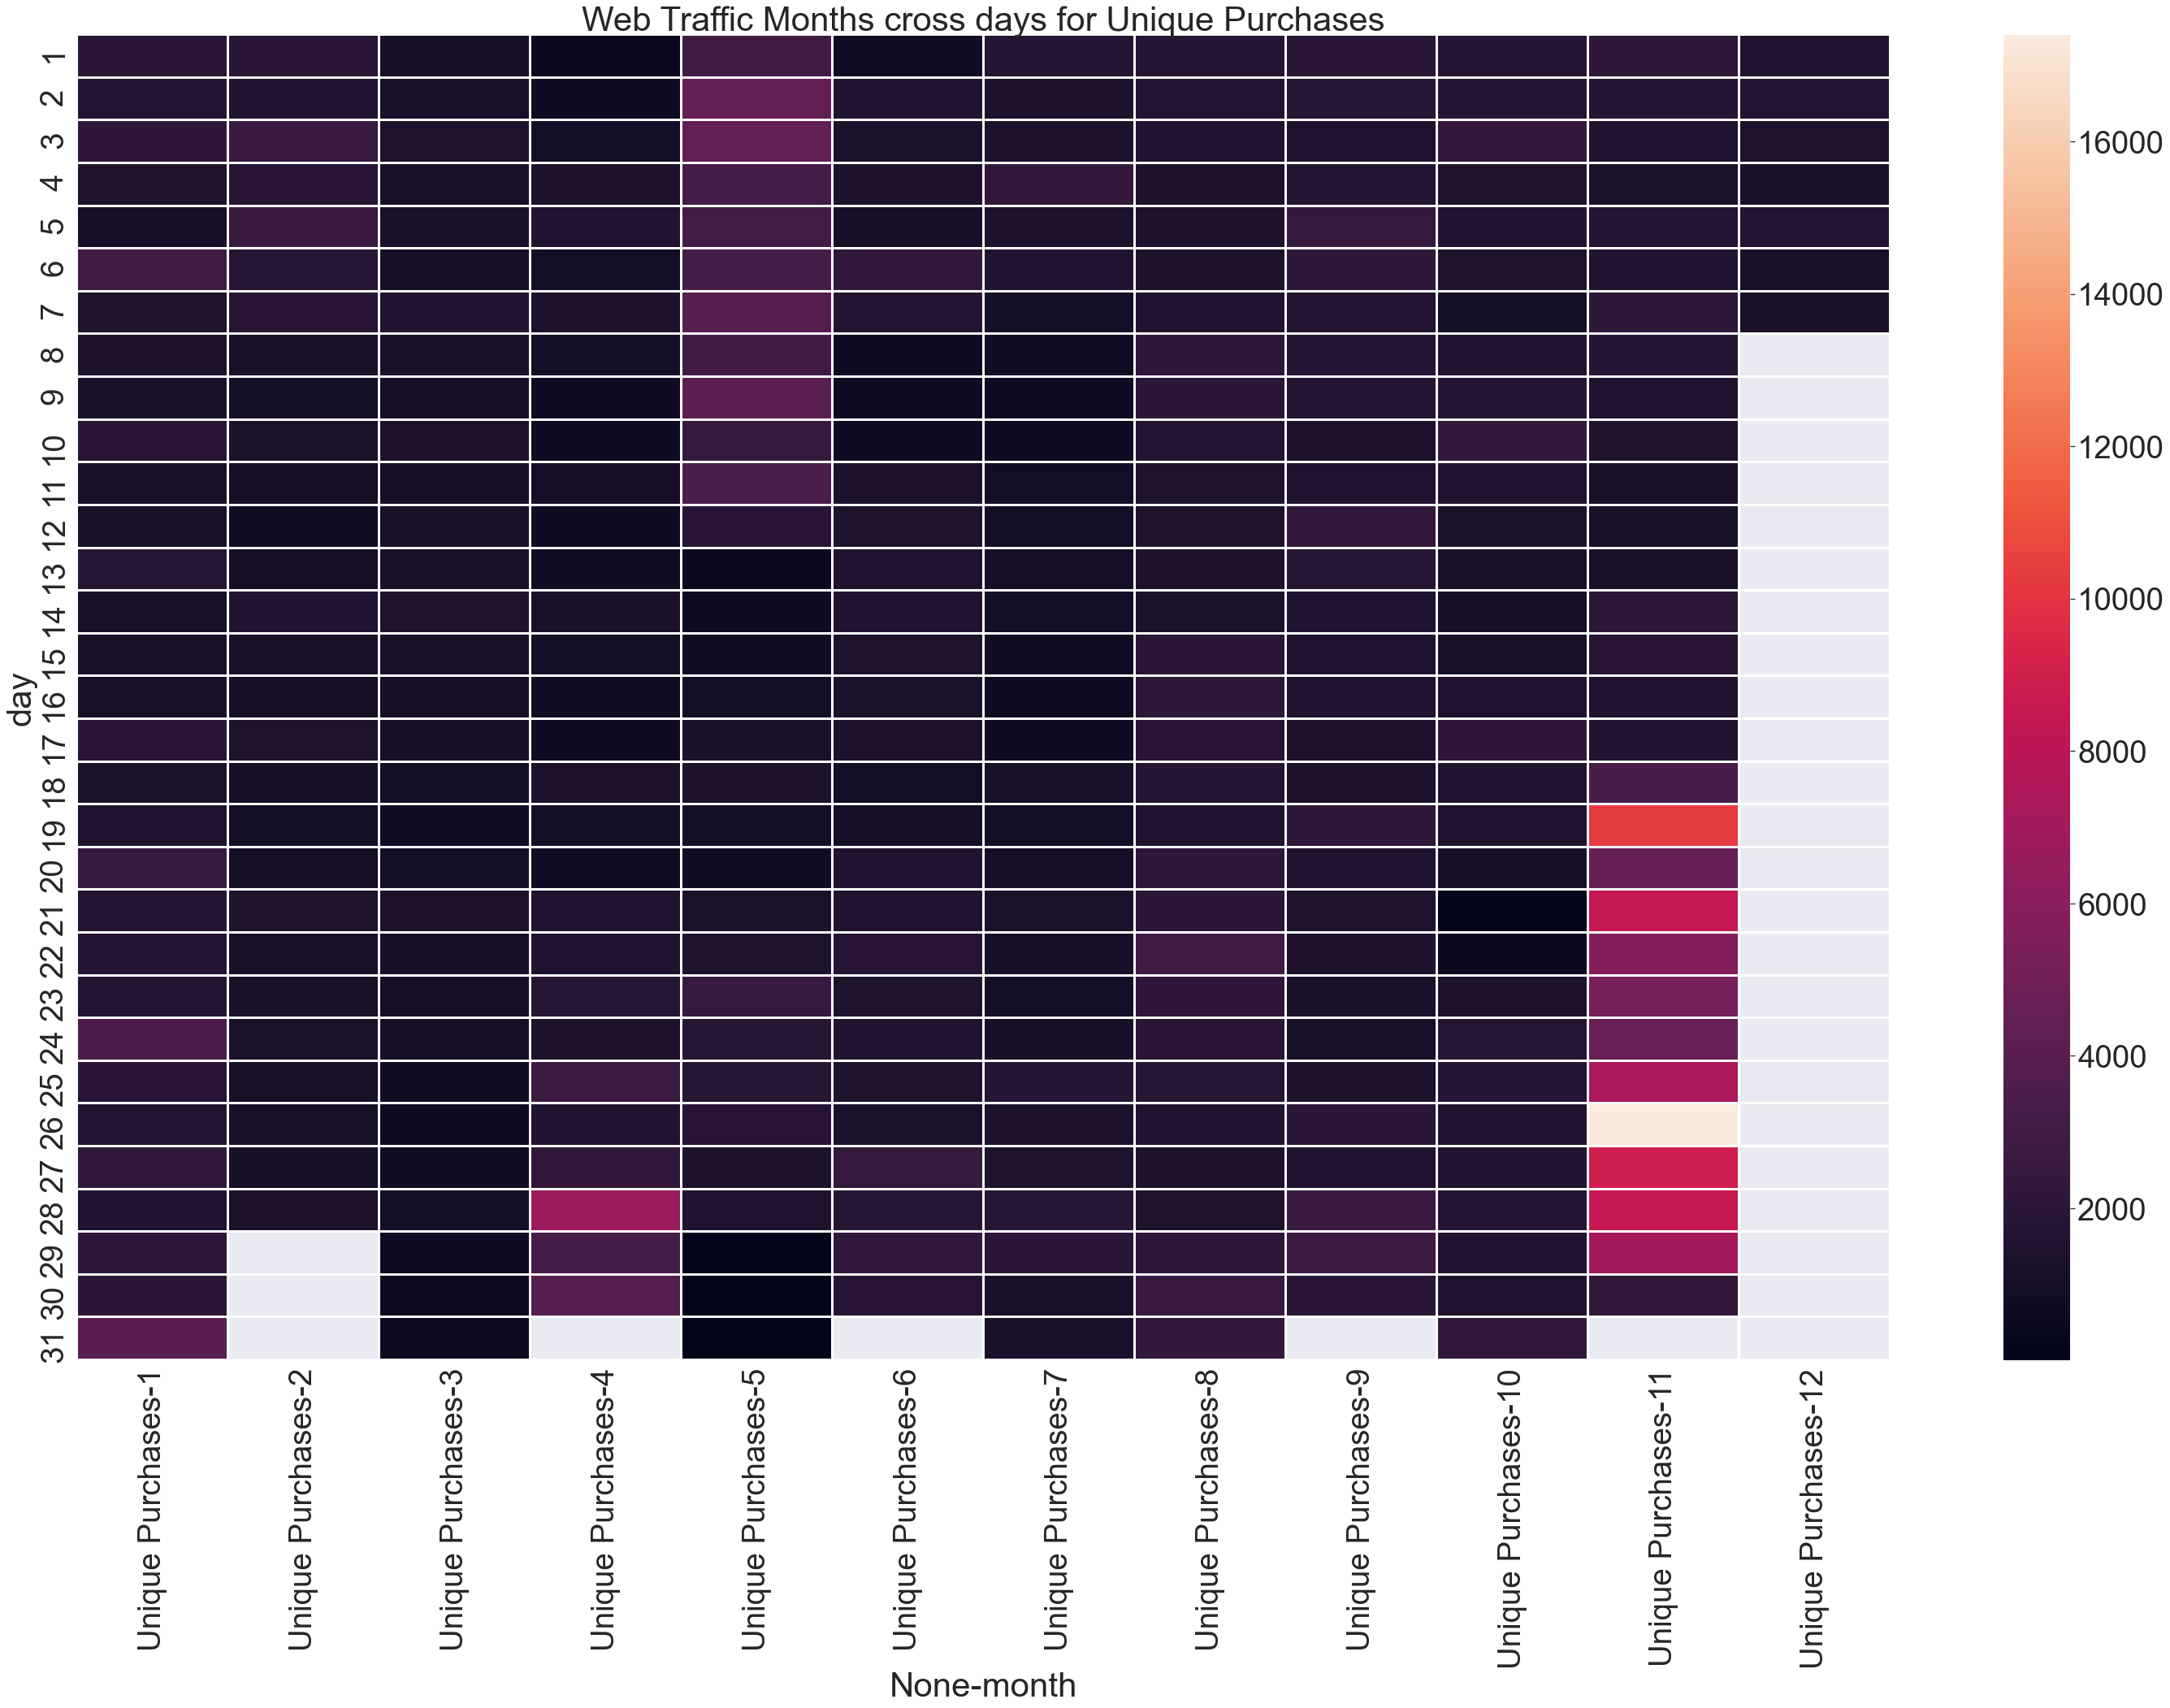

In [23]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(50, 30))
sns.heatmap(GA_day_UP, annot=False, ax=ax, fmt="d", linewidths=2)
plt.title('Web Traffic Months cross days for Unique Purchases')
plt.show()

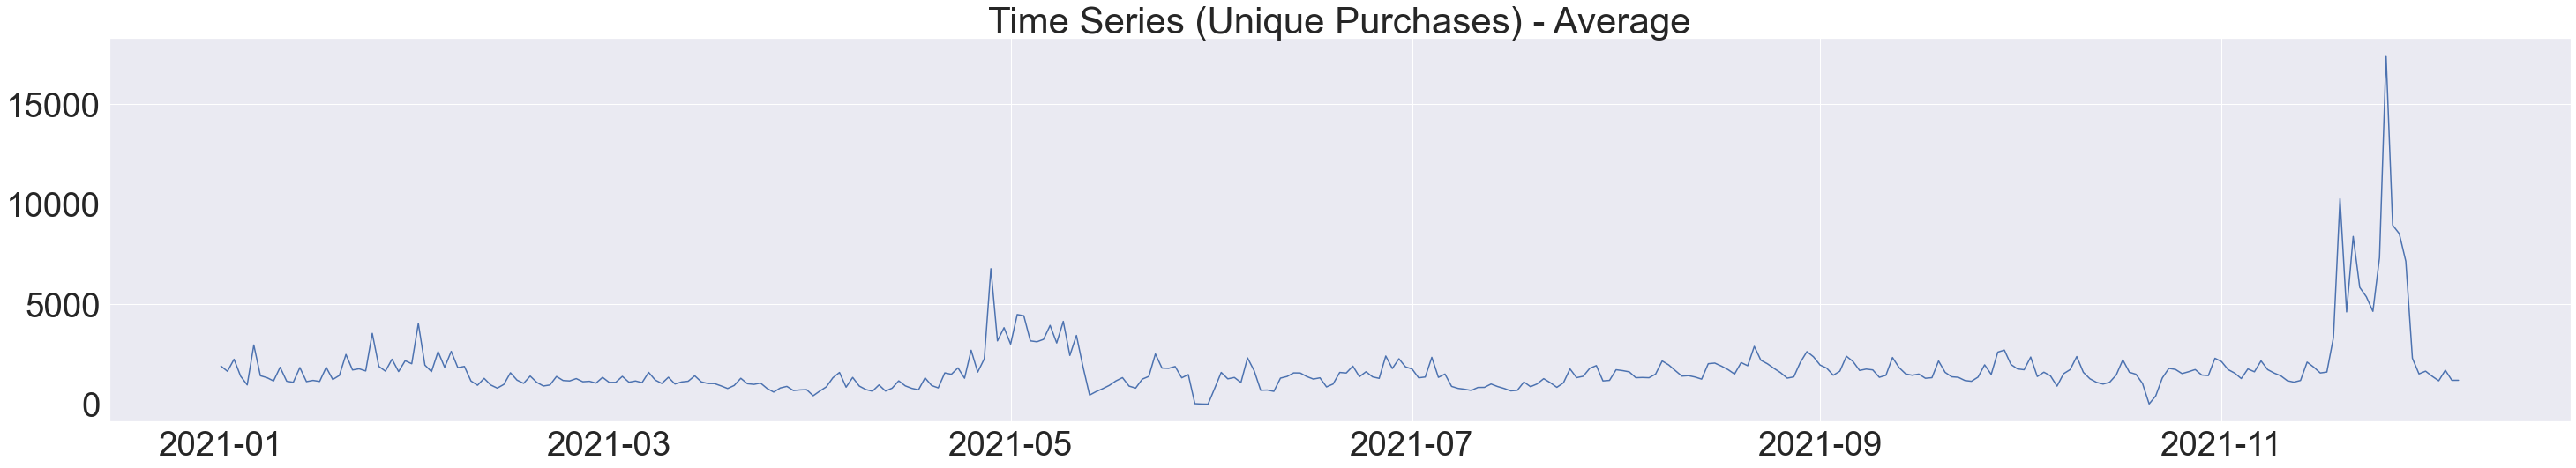

In [24]:
plt.figure(figsize=(50, 8))
mean_group_UP = tableGA[['Date','Unique Purchases']].groupby(['Date'])['Unique Purchases'].mean()
plt.plot(mean_group_UP)
plt.title('Time Series (Unique Purchases) - Average')
plt.show()

In [25]:
UP_timeseries_year_means =  pd.DataFrame(mean_group_UP).reset_index(drop=False)
UP_timeseries_year_means['weekday'] = UP_timeseries_year_means['Date'].apply(lambda x: x.weekday())
UP_timeseries_year_means['Date_str'] = UP_timeseries_year_means['Date'].apply(lambda x: str(x))
UP_timeseries_year_means[['year','month','day']] = pd.DataFrame(UP_timeseries_year_means['Date_str'].str.split('-',2).tolist(), columns = ['year','month','day'])
date_staging = pd.DataFrame(UP_timeseries_year_means['day'].str.split(' ',2).tolist(), columns = ['day','other'])
UP_timeseries_year_means['day'] = date_staging['day']*1
UP_timeseries_year_means.head()
UP_timeseries_year_means.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              341 non-null    datetime64[ns]
 1   Unique Purchases  341 non-null    int32         
 2   weekday           341 non-null    int64         
 3   Date_str          341 non-null    object        
 4   year              341 non-null    object        
 5   month             341 non-null    object        
 6   day               341 non-null    object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(4)
memory usage: 17.4+ KB


In [26]:
# evaluate Rolling mean, Rolling Standard deviation and Test for the stationnarity
df_date_index_UP = UP_timeseries_year_means[['Date','Unique Purchases']].set_index('Date')

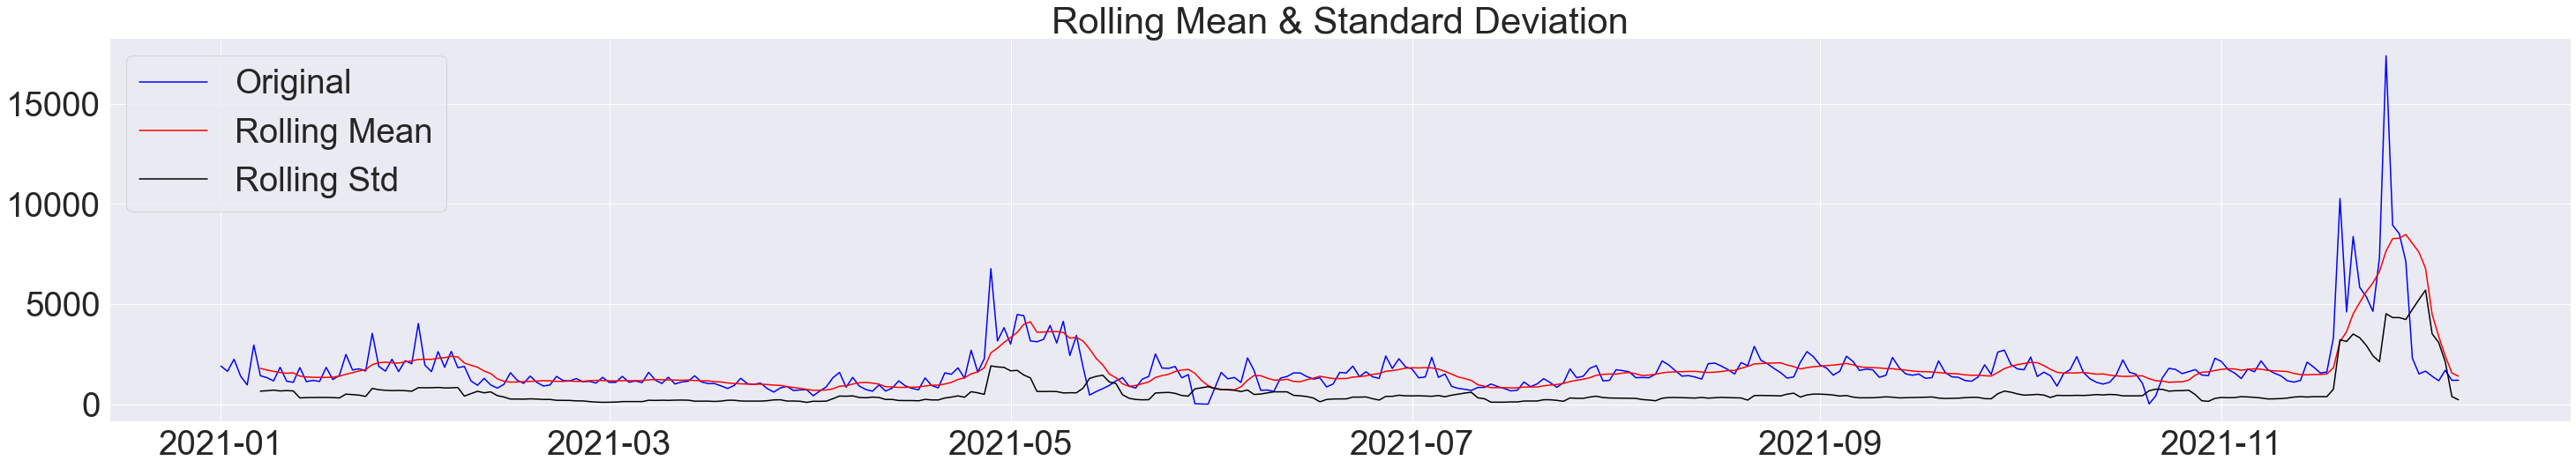

Results of Dickey-Fuller Test:
Test Statistic                  -4.036283
p-value                          0.001232
#Lags Used                      12.000000
Number of Observations Used    328.000000
Critical Value (1%)             -3.450445
Critical Value (5%)             -2.870392
Critical Value (10%)            -2.571486
dtype: float64


In [27]:
def test_stationarity(timeseries):
    plt.figure(figsize=(50, 8))
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = sm.tsa.adfuller(timeseries['Unique Purchases'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
test_stationarity(df_date_index_UP)   

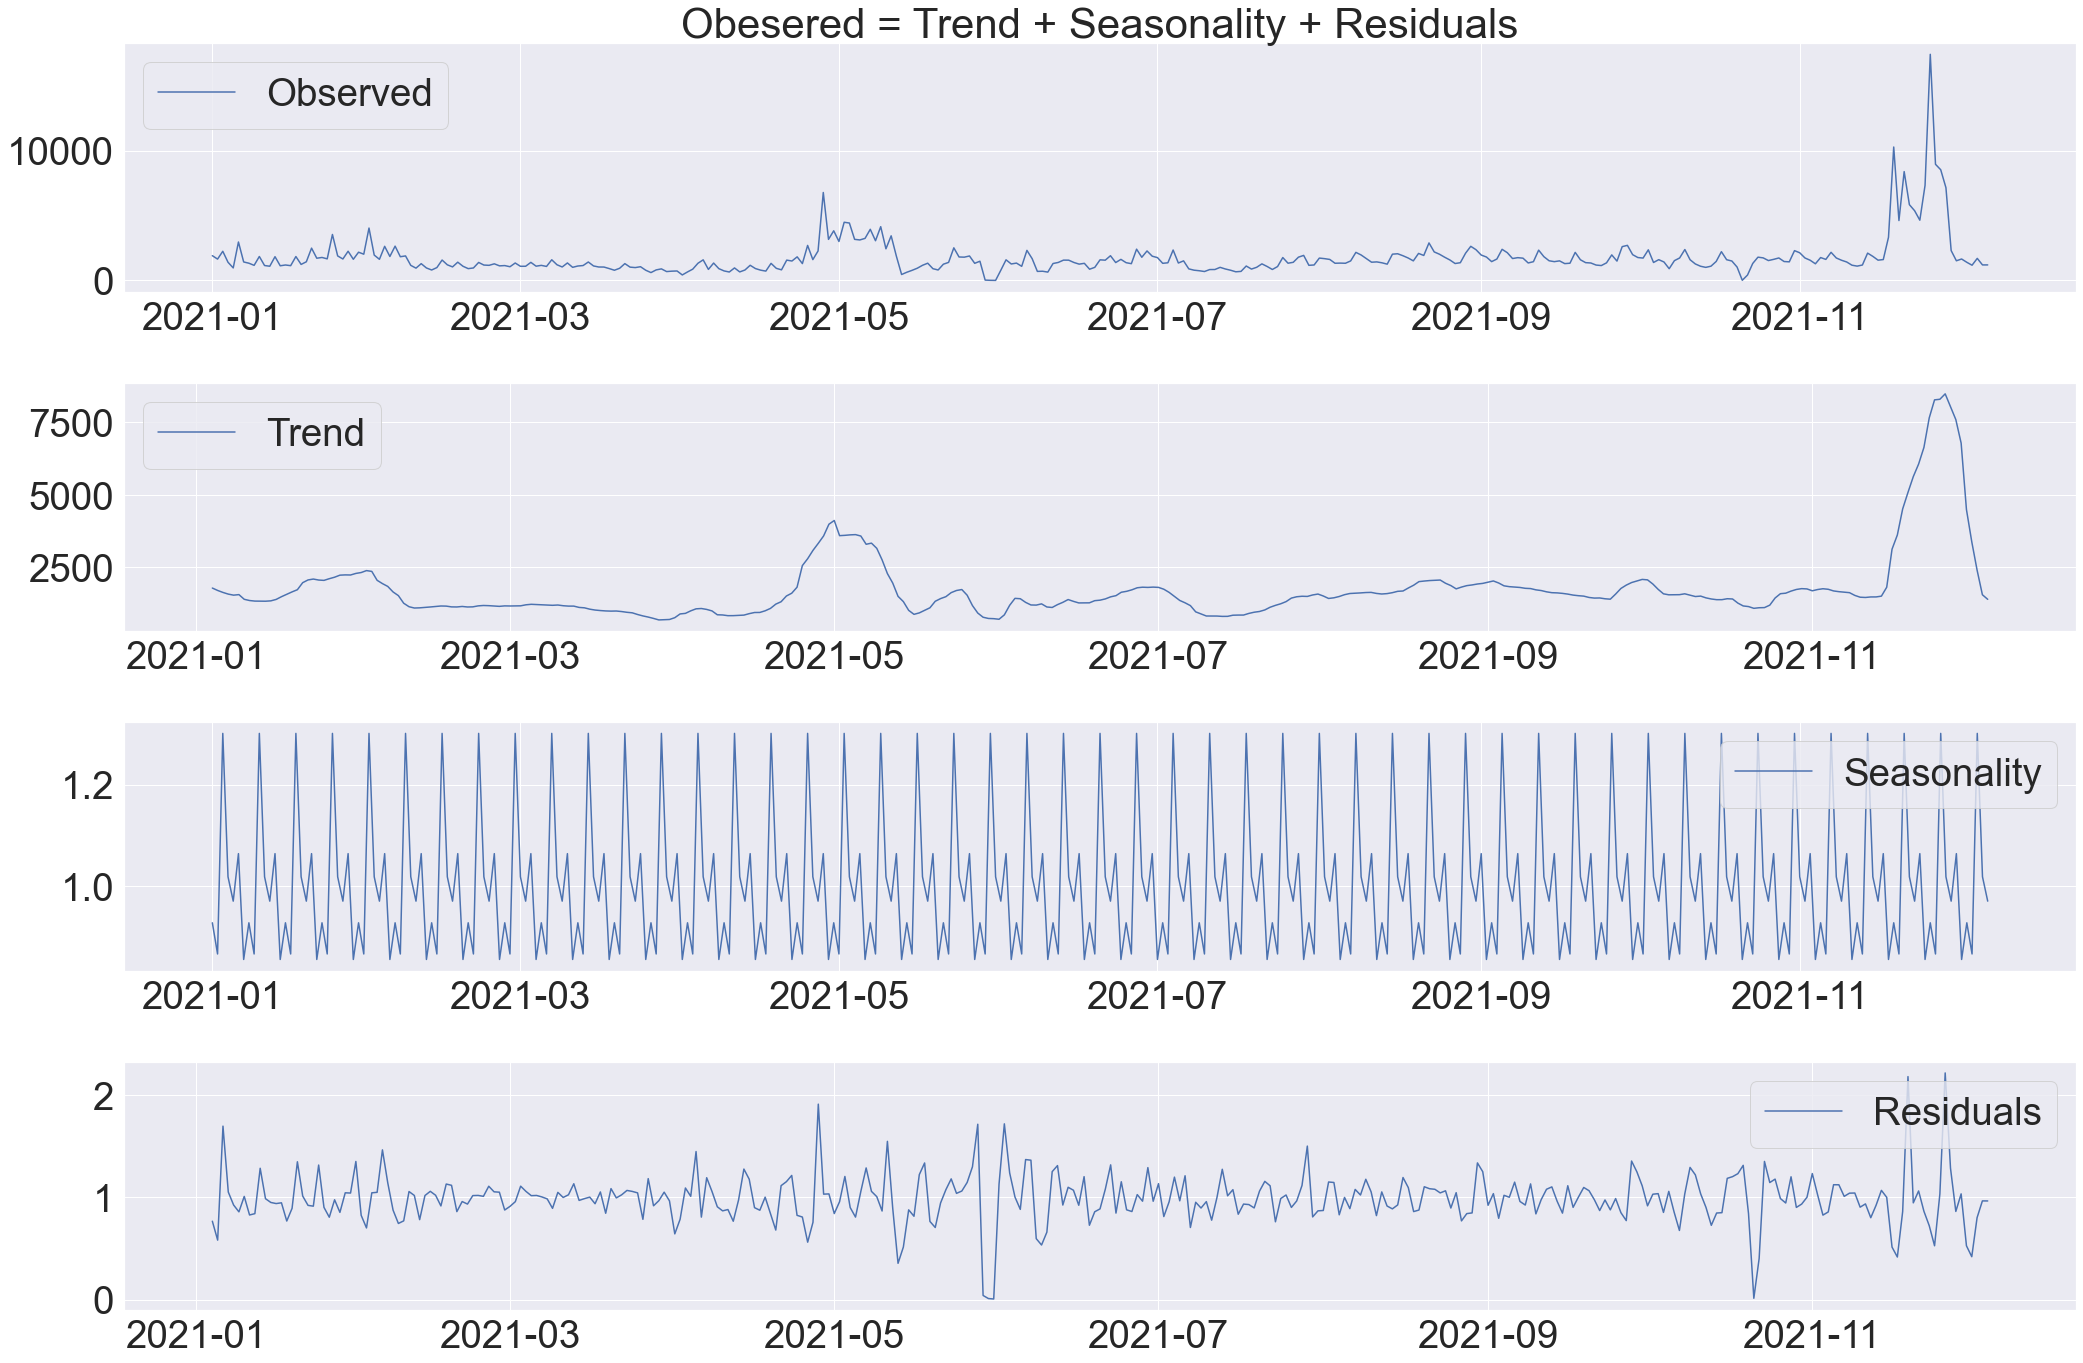

In [28]:
# Naive decomposition of our Time Series as explained above
decomposition = sm.tsa.seasonal_decompose(df_date_index_UP, model='multiplicative',freq = 7)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.rcParams['figure.figsize'] = 30, 20

plt.subplot(411)
plt.title('Obesered = Trend + Seasonality + Residuals')
plt.plot(df_date_index_UP, label='Observed')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

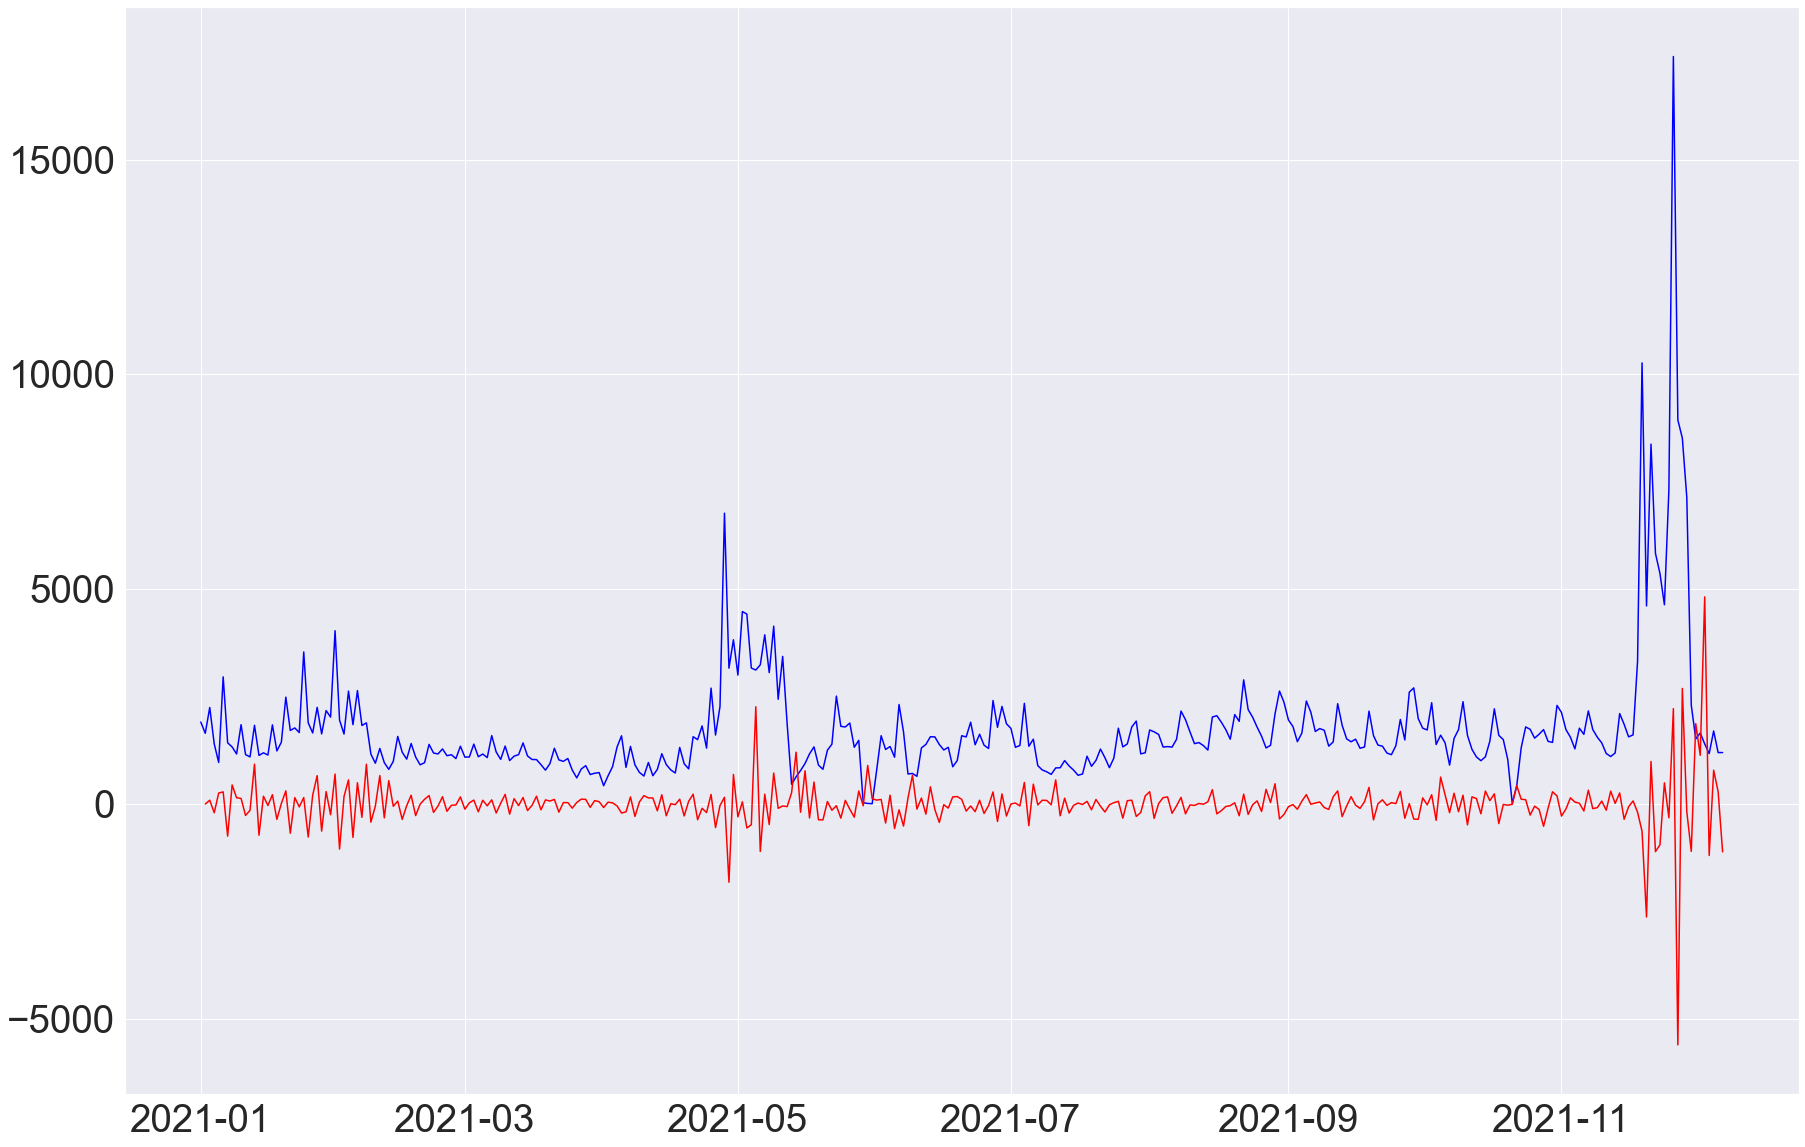

In [29]:
from statsmodels.tsa.arima_model import ARIMA

modelARIMA_UP = ARIMA(df_date_index_UP, order=(7, 1, 0))  
results_AR_UP = modelARIMA_UP.fit(disp=-1)  
plt.plot(df_date_index_UP, color = 'blue')
plt.plot(results_AR_UP.fittedvalues, color='red')
plt.show()

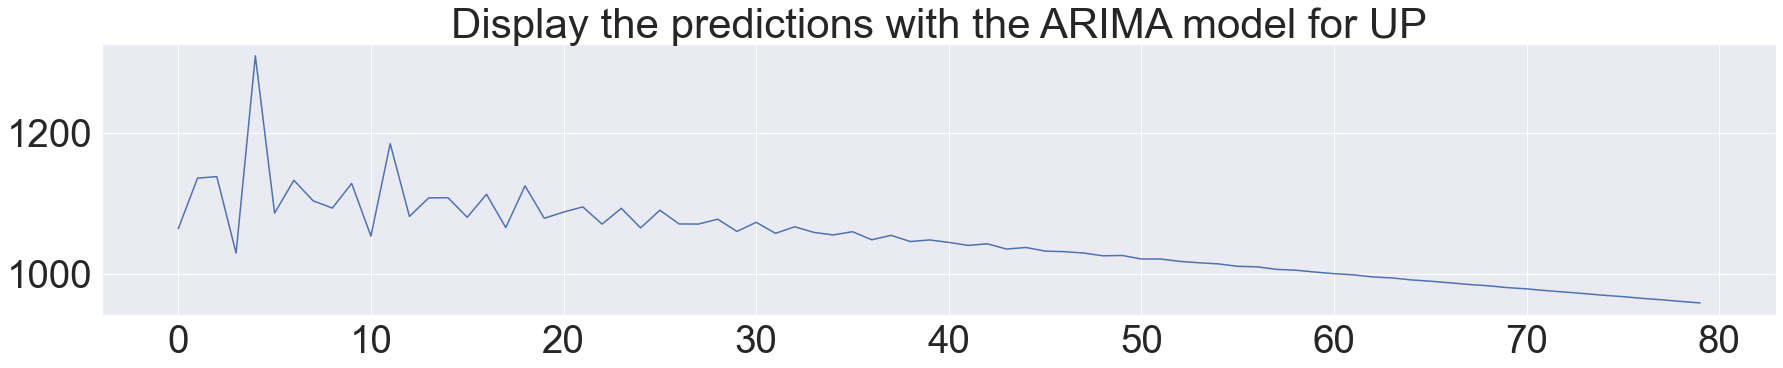

array([1064.01678435, 1135.61727298, 1137.69411047, 1029.39623456,
       1308.78026001, 1086.0212766 , 1132.51505334, 1103.43657028,
       1093.20574903, 1128.02408624, 1053.42678025, 1184.42142764,
       1081.34671069, 1107.62294551, 1107.86834869, 1080.19294192,
       1112.70616877, 1065.51947793, 1124.60469738, 1078.71221431,
       1087.51306882, 1094.84864597, 1070.46027258, 1092.82179076,
       1065.09090863, 1090.16452402, 1070.70490869, 1070.5155093 ,
       1077.44989587, 1060.10006478, 1073.01558384, 1057.40078653,
       1066.69047681, 1058.71104937, 1055.13225511, 1059.70128192,
       1048.28042175, 1054.55317604, 1045.81502902, 1048.02009182,
       1044.5837071 , 1040.31809889, 1042.54767672, 1035.1429774 ,
       1037.34707178, 1032.2237983 , 1031.42206048, 1029.51035223,
       1025.56201285, 1026.03382176, 1021.07035344, 1021.0014724 ,
       1017.64256015, 1015.6807844 , 1014.09741482, 1010.6831235 ,
       1009.99598492, 1006.41215164, 1005.16470129, 1002.59736

In [30]:
forecast_UP = results_AR_UP.forecast(steps = 80)[0]
plt.figure(figsize=(30, 5))
plt.plot(pd.DataFrame(forecast_UP))
plt.title('Display the predictions with the ARIMA model for UP')
plt.show()
forecast_UP

In [31]:
def lag_func(data,lag):
    lag = lag
    X = lagmat(data["diff"], lag)
    lagged = data.copy()
    for c in range(1,lag+1):
        lagged["lag%d" % c] = X[:, c-1]
    return lagged

In [32]:
def diff_creation(data):
    data["diff"] = np.nan
    data.loc[1:, "diff"] = (data.iloc[1:, 1].to_numpy() - data.iloc[:len(data)-1, 1].to_numpy())
    return data

In [33]:
df_count_UP=diff_creation(UP_timeseries_year_means)
# Creation of 7 features with "diff"
lag = 7
lagged = lag_func(df_count_UP,lag)
last_date = lagged['Date'].max()

In [35]:
#DataFrame to collect the predictions
df_prediction_arima_UP = df_date_index_UP.copy()

list_date = []
for i in range(81):
    if i >0:
        list_date.append(last_date  + pd.to_timedelta(i, unit='D'))
    
predictions_arima_UP= pd.DataFrame(list_date,columns = ['Date'])
predictions_arima_UP['Unique Purchases'] = 0
predictions_arima_UP.set_index('Date',inplace=True)
predictions_arima_UP['Unique Purchases'] = (forecast_UP)

df_prediction_arima_UP = df_prediction_arima_UP.append(predictions_arima_UP)
df_prediction_arima_UP.reset_index(drop=False,inplace=True)

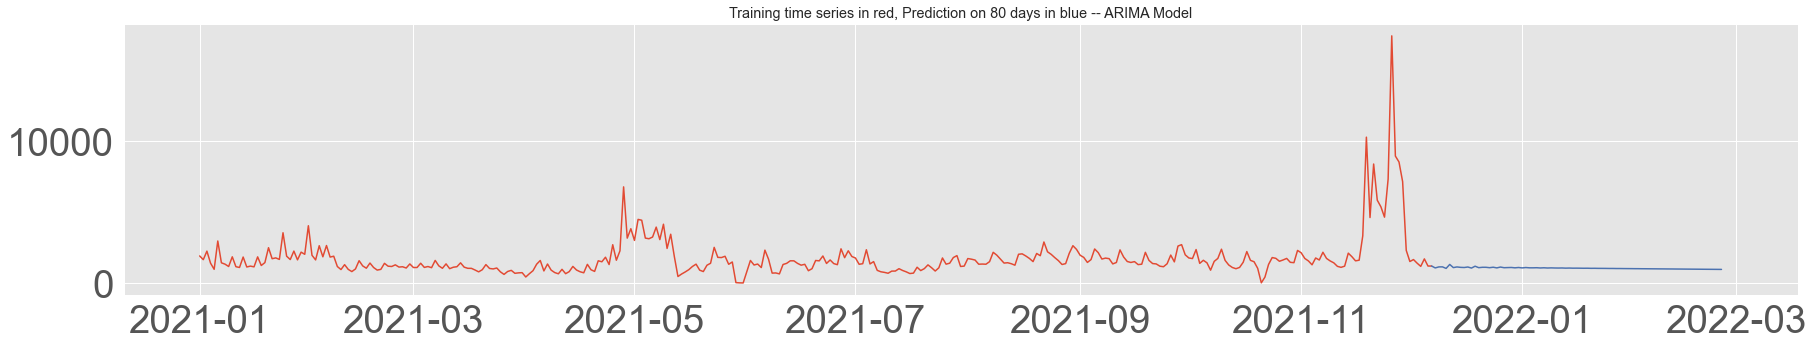

In [37]:
df_arima_UP = df_prediction_arima_UP[['Unique Purchases','Date']]
df_train_UP = df_arima_UP[df_arima_UP['Date'] <= last_date]
df_pred_UP = df_arima_UP[df_prediction_arima_UP['Date'] >= last_date]
plt.style.use('ggplot')
plt.figure(figsize=(30, 5))
plt.plot(df_train_UP.Date,df_train_UP['Unique Purchases'])
plt.plot(df_pred_UP.Date,df_pred_UP['Unique Purchases'],color='b')
plt.title('Training time series in red, Prediction on 80 days in blue -- ARIMA Model')
plt.show()

In [38]:
df_pred_UP.to_csv('ARIMA_PRED_UP_SEPNOTEBOOK_80PRED.csv', index=False)

# Machine learning Approach

In [39]:
UP_timeseries_means =  pd.DataFrame(mean_group_UP).reset_index(drop=False)
UP_timeseries_means['weekday'] = UP_timeseries_means['Date'].apply(lambda x: x.weekday())
UP_timeseries_means['Date_str'] = UP_timeseries_means['Date'].apply(lambda x: str(x))
UP_timeseries_means[['year','month','day']] = pd.DataFrame(UP_timeseries_means['Date_str'].str.split('-',2).tolist(), columns = ['year','month','day'])
date_staging = pd.DataFrame(UP_timeseries_means['day'].str.split(' ',2).tolist(), columns = ['day','other'])
UP_timeseries_means['day'] = date_staging['day']*1
UP_timeseries_means.head()

,Date,Unique Purchases,weekday,Date_str,year,month,day
0,2021-01-01,1907,4,2021-01-01 00:00:00,2021,01,01
1,2021-01-02,1645,5,2021-01-02 00:00:00,2021,01,02
2,2021-01-03,2246,6,2021-01-03 00:00:00,2021,01,03
3,2021-01-04,1400,0,2021-01-04 00:00:00,2021,01,04
4,2021-01-05,966,1,2021-01-05 00:00:00,2021,01,05


In [40]:
df_count_UP=diff_creation(UP_timeseries_means)

In [41]:
# Creation of 7 features with "diff"
lag = 7
lagged_UP = lag_func(df_count_UP,lag)
last_date_UP = lagged_UP['Date'].max()

In [42]:
lagged_UP

,Date,Unique Purchases,weekday,Date_str,year,month,day,diff,lag1,lag2,lag3,lag4,lag5,lag6,lag7
0,2021-01-01,1907,4,2021-01-01 00:00:00,2021,01,01,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-01-02,1645,5,2021-01-02 00:00:00,2021,01,02,-262.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-01-03,2246,6,2021-01-03 00:00:00,2021,01,03,601.0,-262.0,NaN,0.0,0.0,0.0,0.0,0.0
3,2021-01-04,1400,0,2021-01-04 00:00:00,2021,01,04,-846.0,601.0,-262.0,NaN,0.0,0.0,0.0,0.0
4,2021-01-05,966,1,2021-01-05 00:00:00,2021,01,05,-434.0,-846.0,601.0,-262.0,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,2021-12-03,1398,4,2021-12-03 00:00:00,2021,12,03,-254.0,137.0,-784.0,-4839.0,-1381.0,-419.0,-8462.0,10080.0
337,2021-12-04,1173,5,2021-12-04 00:00:00,2021,12,04,-225.0,-254.0,137.0,-784.0,-4839.0,-1381.0,-419.0,-8462.0
338,2021-12-05,1699,6,2021-12-05 00:00:00,2021,12,05,526.0,-225.0,-254.0,137.0,-784.0,-4839.0,-1381.0,-419.0
339,2021-12-06,1196,0,2021-12-06 00:00:00,2021,12,06,-503.0,526.0,-225.0,-254.0,137.0,-784.0,-4839.0,-1381.0


In [43]:
# Train Test split
def train_test(data_lag):
    xc = ["lag%d" % i for i in range(1,lag+1)] + ['weekday'] + ['day']
    split = 0.70
    xt = data_lag[(lag+1):][xc]
    yt = data_lag[(lag+1):]["diff"]
    isplit = int(len(xt) * split)
    x_train, y_train, x_test, y_test = xt[:isplit], yt[:isplit], xt[isplit:], yt[isplit:]
    return x_train, y_train, x_test, y_test, xt, yt

In [44]:
x_train_UP, y_train_UP, x_test_UP, y_test_UP, xt_UP, yt_UP = train_test(lagged_UP)

In [45]:
# Linear Model
from sklearn.ensemble import ExtraTreesRegressor,GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, r2_score

def modelisation(x_tr, y_tr, x_ts, y_ts, xt, yt, model4, model5):
    # Modelisation with all product
    model4.fit(x_tr, y_tr)

    prediction_UP = model4.predict(x_ts)
    r2 = r2_score(y_ts.to_numpy(), model4.predict(x_ts))
    mae = mean_absolute_error(y_ts.to_numpy(), model4.predict(x_ts))
    print ("-----------------------------------------------")
    print ("mae with 70% of the data to train:", mae)
    print ("-----------------------------------------------")

    # Model with all data
    model5.fit(xt, yt) 
    
    return model5, prediction_UP, model4

model4 =  AdaBoostRegressor(n_estimators = 5000, random_state = 42, learning_rate=0.01)
model5 =  AdaBoostRegressor(n_estimators = 5000, random_state = 42, learning_rate=0.01)

clr4, prediction_UP, clr3  = modelisation(x_train_UP, y_train_UP, x_test_UP, y_test_UP, xt_UP, yt_UP, model4, model5)

-----------------------------------------------
mae with 70% of the data to train: 740.0189510948778
-----------------------------------------------


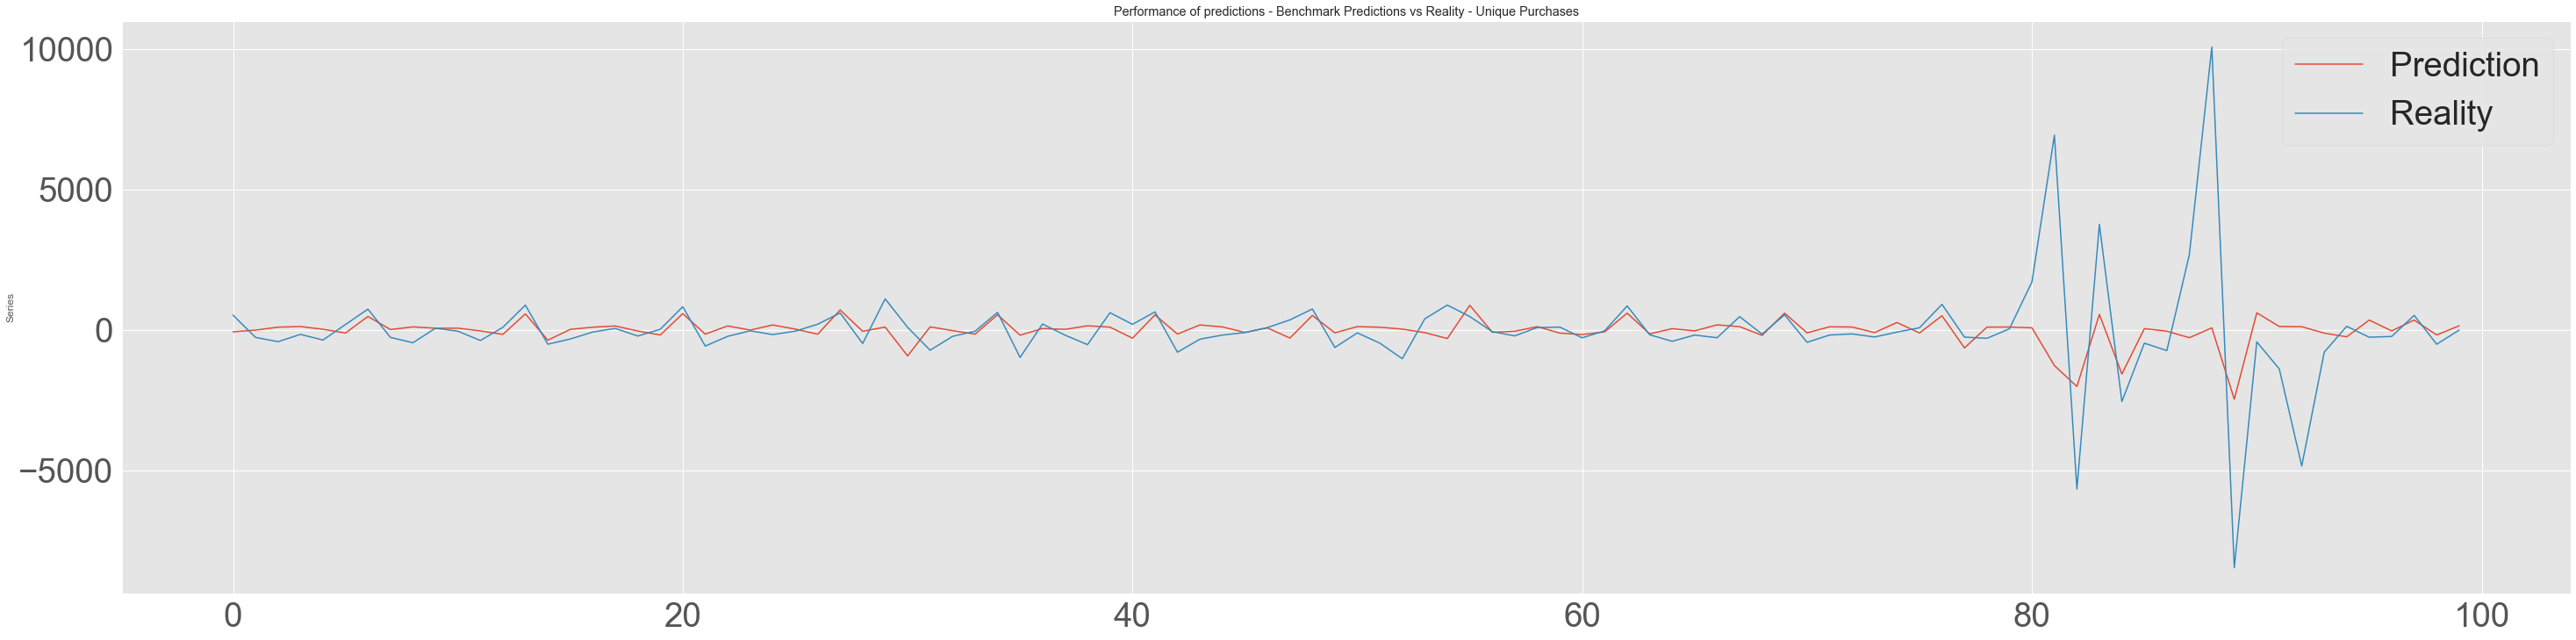

In [46]:
# Performance 1
plt.style.use('ggplot')
plt.figure(figsize=(50, 12))
line_up, = plt.plot(prediction_UP,label='Prediction')
line_down, = plt.plot(np.array(y_test_UP),label='Reality')
plt.ylabel('Series')
plt.legend(handles=[line_up, line_down])
plt.title('Performance of predictions - Benchmark Predictions vs Reality - Unique Purchases')
plt.show()

In [47]:
# Prediction
def pred_df(data,number_of_days):
    data_pred = pd.DataFrame(pd.Series(data["Date"][data.shape[0]-1] + timedelta(days=1)),columns = ["Date"])
    for i in range(number_of_days):
        inter = pd.DataFrame(pd.Series(data["Date"][data.shape[0]-1] + timedelta(days=i+2)),columns = ["Date"])
        data_pred = pd.concat([data_pred,inter]).reset_index(drop=True)
    return data_pred

In [48]:
data_to_pred_UP = pred_df(df_count_UP,80)

In [49]:
data_to_pred_UP

,Date
0,2021-12-08
1,2021-12-09
2,2021-12-10
3,2021-12-11
4,2021-12-12
...,...
76,2022-02-22
77,2022-02-23
78,2022-02-24
79,2022-02-25


In [50]:
def initialisation(data_lag, data_pred, model, xtrain, ytrain, number_of_days):
    # Initialisation
    model.fit(xtrain, ytrain)
    
    for i in range(number_of_days-1):
        lag1 = data_lag.tail(1)["diff"].values[0]
        lag2 = data_lag.tail(1)["lag1"].values[0]
        lag3 = data_lag.tail(1)["lag2"].values[0]
        lag4 = data_lag.tail(1)["lag3"].values[0]
        lag5 = data_lag.tail(1)["lag4"].values[0]
        lag6 = data_lag.tail(1)["lag5"].values[0]
        lag7 = data_lag.tail(1)["lag6"].values[0]
        lag8 = data_lag.tail(1)["lag7"].values[0]
        
        data_pred['weekday'] = data_pred['Date'].apply(lambda x:x.weekday())
        weekday = data_pred['weekday'][0]
        
        row = pd.Series([lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,weekday]
                        ,['lag1', 'lag2', 'lag3','lag4','lag5','lag6','lag7','lag8','weekday'])
        to_predict = pd.DataFrame(columns = ['lag1', 'lag2', 'lag3','lag4','lag5','lag6','lag7','lag8','weekday'])
        prediction = pd.DataFrame(columns = ['diff'])
        to_predict = to_predict.append([row])
        prediction = pd.DataFrame(model.predict(to_predict),columns = ['diff'])

        # Loop
        if i == 0:
            last_predict = data_lag["Unique Purchases"][data_lag.shape[0]-1] + prediction.values[0][0]

        if i > 0 :
            last_predict = data_lag["Unique Purchases"][data_lag.shape[0]-1] + prediction.values[0][0]
            
            data_lag = pd.concat([data_lag,prediction.join(data_pred["Date"]).join(to_predict)]).reset_index(drop=True)
        data_lag["Unique Purchases"][data_lag.shape[0]-1] = last_predict
        
        # test
        data_pred = data_pred[data_pred["Date"]>data_pred["Date"][0]].reset_index(drop=True)
        
    return data_lag

model_fin_UP = AdaBoostRegressor(n_estimators = 5000, random_state = 42, learning_rate=0.01)

In [51]:
lagged_UP = initialisation(lagged_UP, data_to_pred_UP, model_fin_UP, xt_UP, yt_UP, 80)

In [52]:
lagged_UP[lagged_UP['diff']<0]
lagged_UP.loc[(lagged_UP['Unique Purchases'] < 0), 'Unique Purchases'] = 0


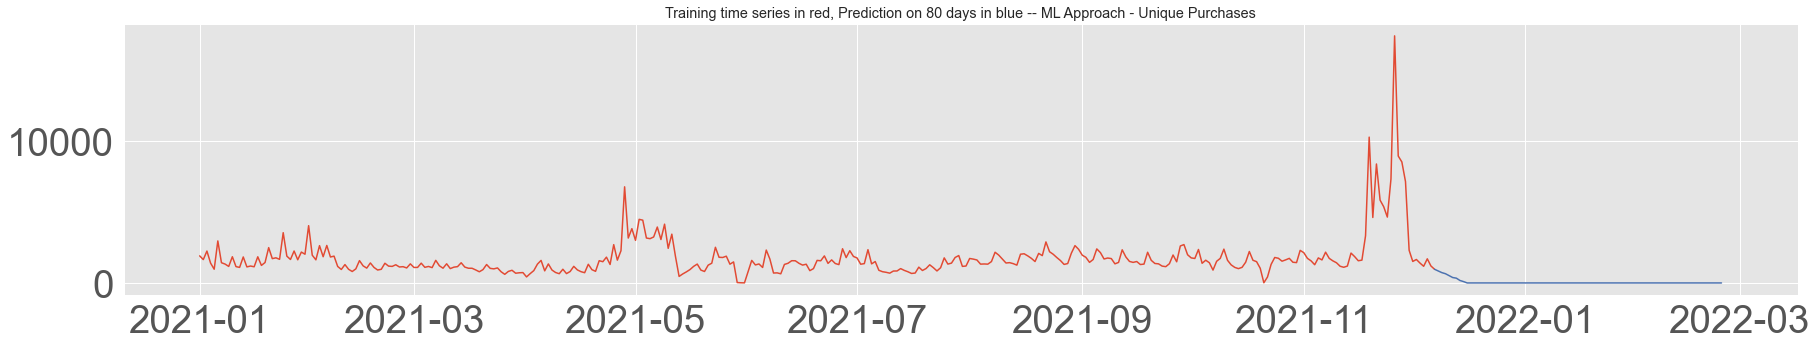

In [53]:
df_lagged_UP = lagged_UP[['Unique Purchases','Date']]
df_train_UP = df_lagged_UP[df_lagged_UP['Date'] <= last_date]
df_pred_UP = df_lagged_UP[df_lagged_UP['Date'] >= last_date]
plt.style.use('ggplot')
plt.figure(figsize=(30, 5))
plt.plot(df_train_UP.Date,df_train_UP['Unique Purchases'])
plt.plot(df_pred_UP.Date,df_pred_UP['Unique Purchases'],color='b')
plt.title('Training time series in red, Prediction on 80 days in blue -- ML Approach - Unique Purchases')
plt.show()

In [54]:
df_pred_UP.to_csv('MLMODEL_PRED_UP_SEPNOTEBOOK_80PRED.csv',index=False)

# BASIC Model

In [55]:
lagged_basic_UP = lagged_UP[['Date','Unique Purchases','weekday']]
lagged_basic_tr_UP   = lagged_basic_UP[lagged_basic_UP['Date'] < last_date_UP]
lagged_basic_pred_UP = lagged_basic_UP[lagged_basic_UP['Date'] >= last_date_UP]
lagged_basic_pred_UP.drop('Unique Purchases',inplace=True,axis=1)

In [56]:
prediction_by_days_UP = pd.DataFrame(lagged_basic_UP.groupby(['weekday'])['Unique Purchases'].mean())
prediction_by_days_UP.reset_index(drop=False,inplace=True)
prediction_by_days_UP

,weekday,Unique Purchases
0,0.0,1433.529889
1,1.0,1292.875739
2,2.0,1413.957521
3,3.0,1197.686486
4,4.0,1540.765684
5,5.0,1259.461023
6,6.0,1854.298106


In [58]:
lagged_basic_pred_UP

,Date,weekday
340,2021-12-07,1.0
341,2021-12-09,3.0
342,2021-12-10,4.0
343,2021-12-11,5.0
344,2021-12-12,6.0
...,...,...
414,2022-02-20,6.0
415,2022-02-21,0.0
416,2022-02-22,1.0
417,2022-02-23,2.0


In [59]:
basic_pred_UP = pd.merge(lagged_basic_pred_UP,prediction_by_days_UP,on='weekday')
basic_approach_UP = pd.concat([lagged_basic_tr_UP,basic_pred_UP])

In [60]:
plot_basic_UP = np.array(basic_approach_UP[basic_approach_UP['Date'] > last_date].sort_values(by='Date')['Unique Purchases'])

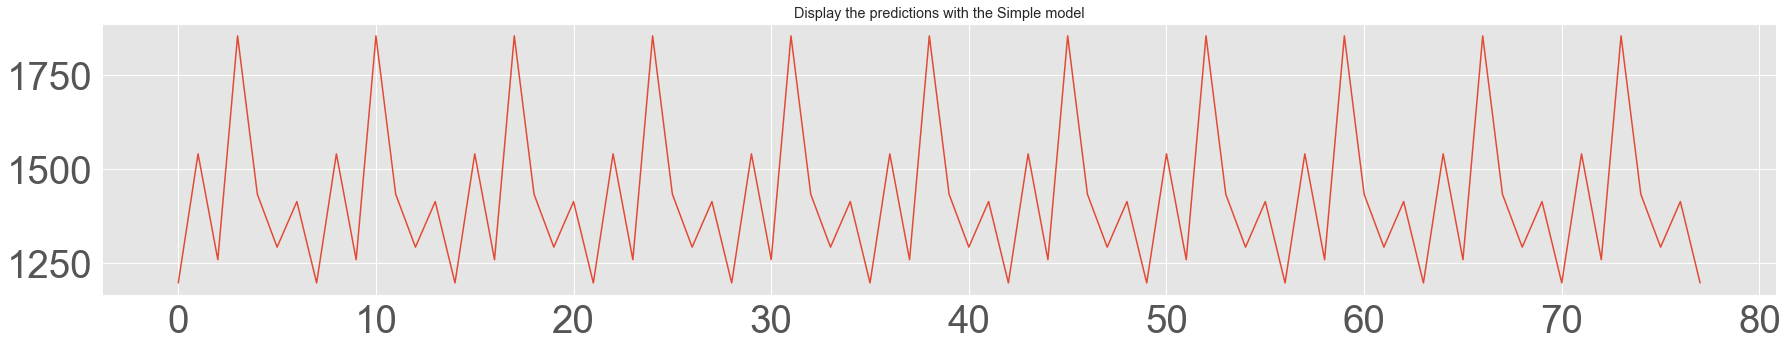

In [61]:
plt.figure(figsize=(30, 5))
plt.plot(plot_basic_UP)
plt.title('Display the predictions with the Simple model')
plt.show()

In [62]:
basic_pred_UP

,Date,weekday,Unique Purchases
0,2021-12-07,1.0,1292.875739
1,2021-12-14,1.0,1292.875739
2,2021-12-21,1.0,1292.875739
3,2021-12-28,1.0,1292.875739
4,2022-01-04,1.0,1292.875739
...,...,...,...
74,2022-01-26,2.0,1413.957521
75,2022-02-02,2.0,1413.957521
76,2022-02-09,2.0,1413.957521
77,2022-02-16,2.0,1413.957521


In [63]:
basic_pred_UP.to_csv('BASIC-MODEL_PRED_UP_SEPNOTEBOOK_80PRED.csv', index=False)